<a href="https://colab.research.google.com/github/rafbot-v7/credit_card_fraud/blob/main/roop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gdown
url = 'https://drive.google.com/uc?id=1-kv4QTwvdqVMAgwHfcT92hOCcfwV1Urq'
output = 'fraud_test.csv'
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1-kv4QTwvdqVMAgwHfcT92hOCcfwV1Urq
From (redirected): https://drive.google.com/uc?id=1-kv4QTwvdqVMAgwHfcT92hOCcfwV1Urq&confirm=t&uuid=f0c39b36-8e73-42c0-81b2-f0f3bab5f14d
To: /content/fraud_test.csv
100%|██████████| 150M/150M [00:01<00:00, 116MB/s]


'fraud_test.csv'

In [ ]:
import gdown
url = 'https://drive.google.com/uc?id=1savE2kJZIGa_z4-QHeiNDgrvsWH4kPMe'
output = 'fraudTrain.csv'
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1savE2kJZIGa_z4-QHeiNDgrvsWH4kPMe
From (redirected): https://drive.google.com/uc?id=1savE2kJZIGa_z4-QHeiNDgrvsWH4kPMe&confirm=t&uuid=62f9d8ae-a74d-48a1-bd3d-fe08621f6e6c
To: /content/fraudTrain.csv
100%|██████████| 351M/351M [00:03<00:00, 114MB/s]


'fraudTrain.csv'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import  numpy as np
import seaborn as sns

In [ ]:
traindf = pd.read_csv('fraudTrain.csv')
traindf['trans_date_trans_time'] = pd.to_datetime(traindf['trans_date_trans_time'])
traindf['dayoweek'] = traindf['trans_date_trans_time'].dt.day_of_week
traindf['month'] = traindf['trans_date_trans_time'].dt.month
traindf['hour'] = traindf['trans_date_trans_time'].dt.hour

traindf.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,dayoweek,month,hour
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,1,1,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,1,1,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,1,1,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,1,1,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,1,1,0


In [ ]:
testdf = pd.read_csv('fraudTrain.csv')
testdf['trans_date_trans_time'] = pd.to_datetime(testdf['trans_date_trans_time'])

testdf['Hour'] = testdf['trans_date_trans_time'].dt.hour
testdf['DayOfWeek'] = testdf['trans_date_trans_time'].dt.dayofweek
testdf['Month'] = testdf['trans_date_trans_time'].dt.month

In [ ]:

testdf.head(20)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,Hour,DayOfWeek,Month
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,1,1
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,1,1
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,1,1
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,1,1
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,1,1
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,...,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0,0,1,1
6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,...,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0,0,1,1
7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,...,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0,0,1,1
8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,...,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0,0,1,1
9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,...,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0,0,1,1


In [ ]:
traindf.nunique()


Unnamed: 0               1296675
trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

In [ ]:
testdf.nunique()

Unnamed: 0               555719
trans_date_trans_time    544760
cc_num                      924
merchant                    693
category                     14
amt                       37256
first                       341
last                        471
gender                        2
street                      924
city                        849
state                        50
zip                         912
lat                         910
long                        910
city_pop                    835
job                         478
dob                         910
trans_num                555719
unix_time                544760
merch_lat                546490
merch_long               551770
is_fraud                      2
dtype: int64

In [ ]:
traindf.shape


(1296675, 23)

In [ ]:
testdf.shape

(555719, 23)

<ipython-input-29-3c36f86522ba>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_fraud',data=traindf,palette='hls')


<function matplotlib.pyplot.show(close=None, block=None)>

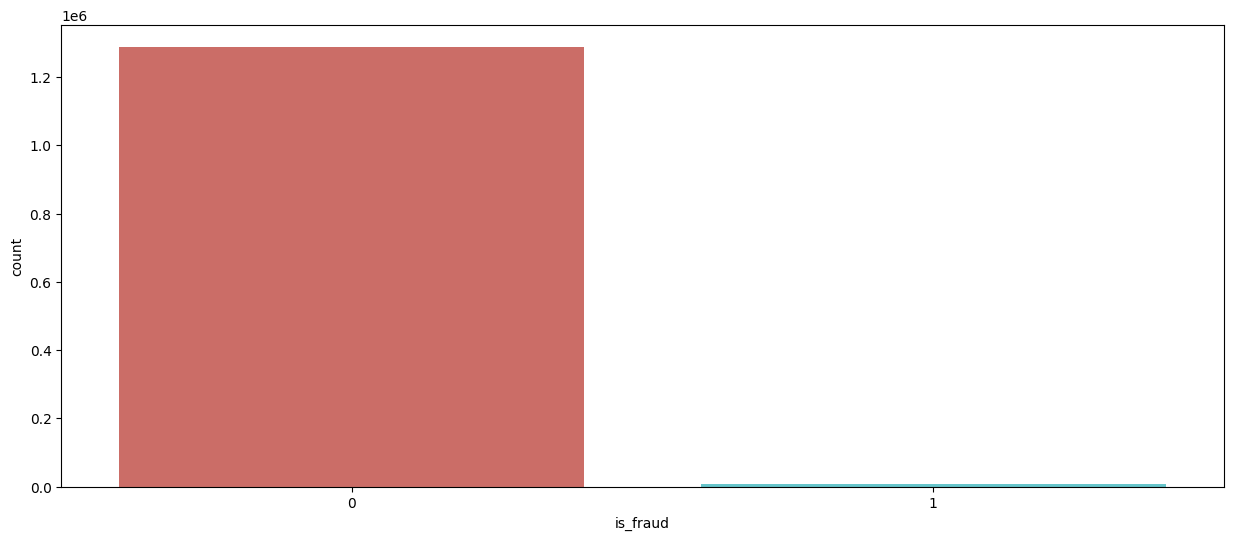

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x='is_fraud',data=traindf,palette='hls')
plt.show

<ipython-input-30-3c36f86522ba>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_fraud',data=traindf,palette='hls')


<function matplotlib.pyplot.show(close=None, block=None)>

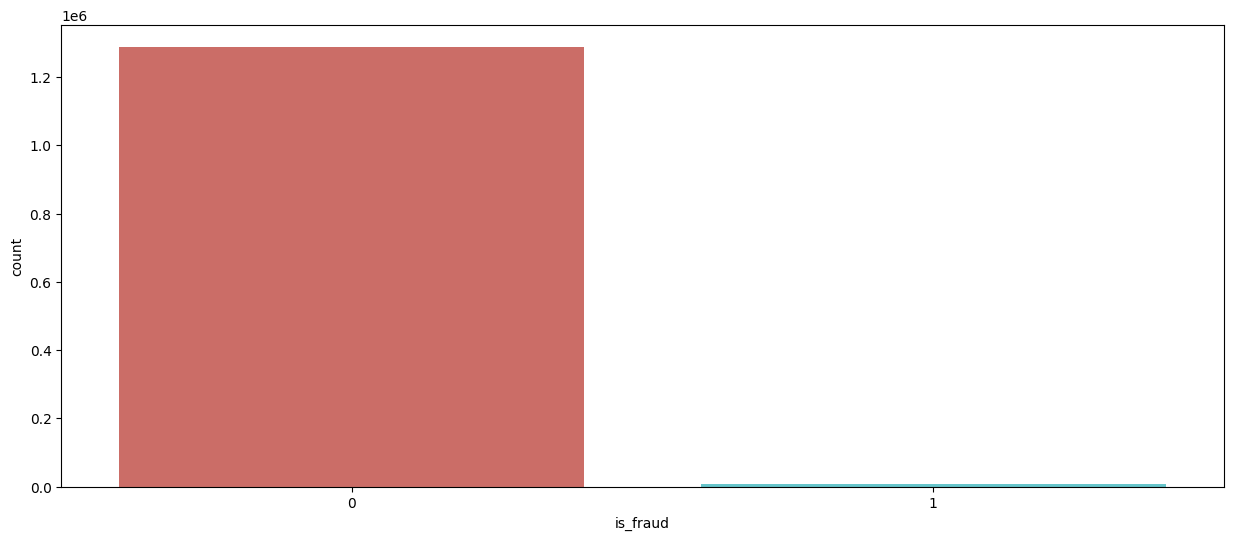

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x='is_fraud',data=traindf,palette='hls')
plt.show

In [ ]:
traindf.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
testdf.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
traindf.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [ ]:
traindf.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
lebelencoder = LabelEncoder()
categorical_columns = ['merchant', 'category', 'state', 'job']
combined_df = pd.concat([traindf, testdf])
combined_df[categorical_columns] = combined_df[categorical_columns].astype(str)

labelencoder = LabelEncoder()


for column in categorical_columns:
    combined_df[column] = labelencoder.fit_transform(combined_df[column])


traindf = combined_df[:len(traindf)]
testdf = combined_df[len(traindf):]

In [ ]:
testdf = testdf[['merchant', 'category', 'state', 'job','is_fraud']]
traindf = traindf[['merchant', 'category', 'state', 'job','is_fraud']]

In [ ]:
testdf.head()

,merchant,category,state,job,is_fraud
0,319,10,40,288,0
1,591,10,44,406,0
2,611,5,34,272,0
3,222,9,9,422,0
4,292,13,22,205,0


In [ ]:
Xtrain = traindf.iloc[:, :-1]
Ytrain = traindf['is_fraud']
Xtest  = testdf.iloc[:, :-1]
Ytest = testdf['is_fraud']

In [ ]:
pip install imbalanced-learn


In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Initialize RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Perform oversampling
Xtrain, Ytrain = oversampler.fit_resample(Xtrain, Ytrain)
Xtest, Ytest = oversampler.fit_resample(Xtest, Ytest)

In [ ]:
Xtest

,merchant,category,state,job
0,319,10,40,288
1,591,10,44,406
2,611,5,34,272
3,222,9,9,422
4,292,13,22,205
...,...,...,...,...
1107143,347,11,6,102
1107144,238,11,34,297
1107145,349,8,21,476
1107146,552,6,28,487


In [ ]:
Xtrain

,merchant,category,state,job
0,514,8,27,372
1,241,4,47,431
2,390,0,13,308
3,360,2,26,330
4,297,9,45,116
...,...,...,...,...
2578333,40,0,31,162
2578334,529,7,43,489
2578335,105,11,43,270
2578336,467,12,43,411


In [ ]:
Ytrain

0          0
1          0
2          0
3          0
4          0
          ..
2578333    1
2578334    1
2578335    1
2578336    1
2578337    1
Name: is_fraud, Length: 2578338, dtype: int64

In [ ]:
Ytest

0          0
1          0
2          0
3          0
4          0
          ..
1107143    1
1107144    1
1107145    1
1107146    1
1107147    1
Name: is_fraud, Length: 1107148, dtype: int64

In [ ]:
Ytest.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

<ipython-input-51-a74214c34a41>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=Ytest.tail(),palette='hls')


<function matplotlib.pyplot.show(close=None, block=None)>

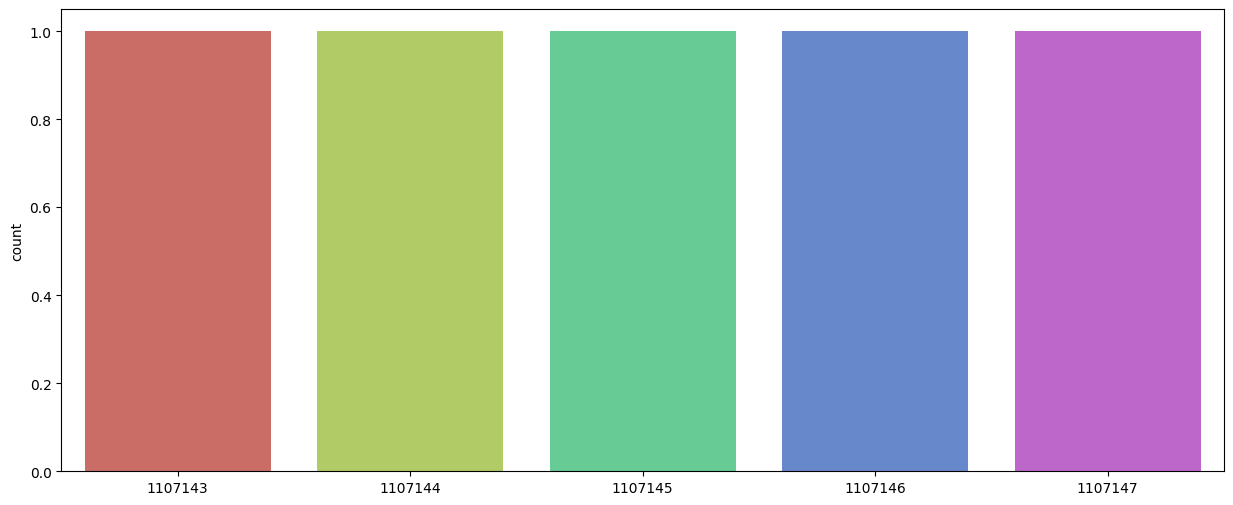

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data=Ytest.tail(),palette='hls')
plt.show

In [ ]:
#Neural network model
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(Xtrain.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 705 (2.75 KB)
Trainable params: 705 (2.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(Xtrain, Ytrain, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
64459/64459 [==============================] - 99s 2ms/step - loss: 0.7034 - accuracy: 0.6044 - val_loss: 0.8831 - val_accuracy: 0.0148
Epoch 2/10
64459/64459 [==============================] - 105s 2ms/step - loss: 0.6450 - accuracy: 0.6239 - val_loss: 0.9951 - val_accuracy: 0.0382
Epoch 3/10
64459/64459 [==============================] - 103s 2ms/step - loss: 0.6308 - accuracy: 0.6259 - val_loss: 0.8858 - val_accuracy: 0.2334
Epoch 4/10
64459/64459 [==============================] - 103s 2ms/step - loss: 0.6215 - accuracy: 0.6361 - val_loss: 0.9011 - val_accuracy: 0.2359
Epoch 5/10
64459/64459 [==============================] - 97s 1ms/step - loss: 0.6141 - accuracy: 0.6462 - val_loss: 0.8738 - val_accuracy: 0.2066
Epoch 6/10
64459/64459 [==============================] - 103s 2ms/step - loss: 0.6122 - accuracy: 0.6465 - val_loss: 0.8594 - val_accuracy: 0.3457
Epoch 7/10
64459/64459 [==============================] - 103s 2ms/step - loss: 0.6117 - accuracy: 0.6462 - val_lo

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred_prob = model.predict(Xtest)
# Convert probabilities to binary predictions
y_pred = np.round(y_pred_prob)
# Print accuracy metrics
accuracy = accuracy_score(Ytest, y_pred)
precision = precision_score(Ytest, y_pred)
recall = recall_score(Ytest, y_pred)
f1 = f1_score(Ytest, y_pred)
# Print accuracy metrics
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))


print(y_pred_prob[:5])
y_pred[:5]

34599/34599 [==============================] - 33s 950us/step
Accuracy: 56.28%
Precision: 0.70
Recall: 0.22
F1 Score: 0.34
[[0.45956543]
 [0.4602457 ]
 [0.14188124]
 [0.45432362]
 [0.47589368]]


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

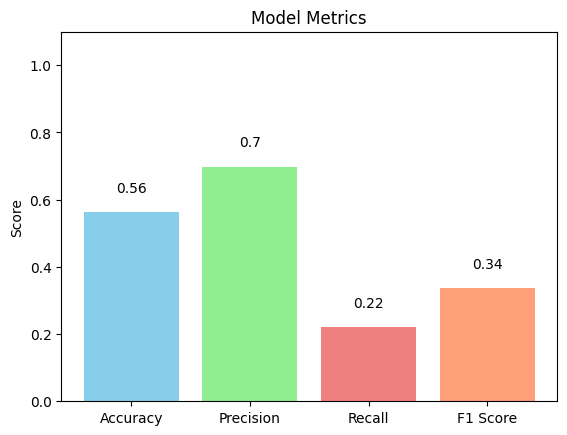

In [ ]:
import matplotlib.pyplot as plt
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]
# Define custom colors for bars and text
bar_colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon']
plt.bar(metrics, values, color=bar_colors)
# Adding values on top of each bar
for i, v in enumerate(values):
    plt.text(i, v + 0.05, str(round(v, 2)), ha='center', va='bottom')
plt.ylabel('Score')
plt.title('Model Metrics')
plt.ylim(0, 1.1)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
model_rf.fit(Xtrain, Ytrain)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_prob = model_rf.predict(Xtest)
# Convert probabilities to binary predictions
y_pred = np.round(y_pred_prob)
# Print accuracy metrics
accuracy = accuracy_score(Ytest, y_pred)
precision = precision_score(Ytest, y_pred)
recall = recall_score(Ytest, y_pred)
f1 = f1_score(Ytest, y_pred)
# Print accuracy metrics
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))


print(y_pred_prob[:5])
y_pred[:5]

Accuracy: 49.53%
Precision: 0.20
Recall: 0.00
F1 Score: 0.01
[0 0 0 0 0]


array([0, 0, 0, 0, 0])

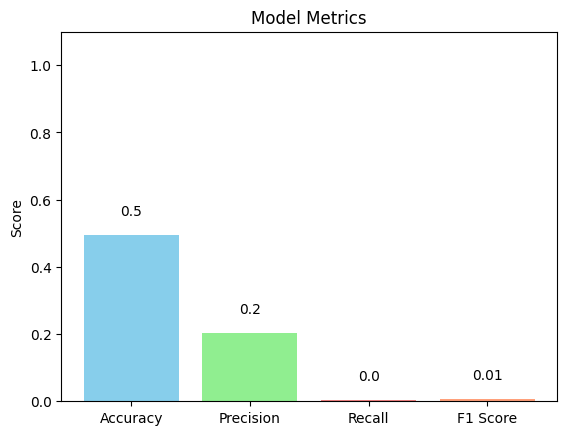

In [ ]:
import matplotlib.pyplot as plt
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]
# Define custom colors for bars and text
bar_colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon']
plt.bar(metrics, values, color=bar_colors)
# Adding values on top of each bar
for i, v in enumerate(values):
    plt.text(i, v + 0.05, str(round(v, 2)), ha='center', va='bottom')
plt.ylabel('Score')
plt.title('Model Metrics')
plt.ylim(0, 1.1)
plt.show()

In [ ]:
# Save model architecture as JSON
model_json = model.to_json()
with open("credit_card_model_architecture.json", "w") as json_file:
    json_file.write(model_json)

# Save model weights
model.save("credit_card_model.h5")